<img src='../img/acam_logos.png' alt='Logo EU Copernicus EUMETSAT' align='right' width='65%'></img>

<br>

# 1.2 AC SAF - GOME-2 - Level 3 - Absorbing Aerosol Index (AAI) data

###  Fire Monitoring - September 2015 - Indonesian Fires

The data of the GOME-2 `Absorbing Aerosol Index (AAI)` are provided by KNMI in the framework of the [EUMETSAT Satellite Application Facility on Atmospheric Composition Monitoring (AC SAF)](https://acsaf.org/index.html).

The Absorbing Aerosol Index (AAI) indicates the presence of elevated absorbing aerosols in the Earth's atmosphere. The aerosol types that are mostly seen in the AAI are desert dust and biomass burning aerosols. 

The web-based service for atmospheric satellite data products [TEMIS](http://www.temis.nl/airpollution/absaai/), maintained by KNMI, provides daily and monthly aggregated Level 3 (gridded) data products for the three satellites Metop-A, -B, and -C.

Find more information on the GOME-2 Level 3 AAI data product processed by KNMI [here](http://www.temis.nl/airpollution/absaai/gome2/GOME2_aai.README).

#### Indonesian Fires 2015

In 2015, devastating wildfires broke out in Indonesia. As reported by [Reuters](https://www.reuters.com/article/us-indonesia-politics-haze-analysis-idUSKCN1UV0ZJ), "Between June and October that year, about 2.6 million hectares (6.4 million acres) of land burned in Indonesia, mainly on Sumatra and Borneo islands, said a 2016 World Bank report. A Harvard University study linked the 2015 haze to more than 100,000 premature deaths in Indonesia, Malaysia and Singapore."

#### This module has the following outline:
* [1 - Load and browse GOME-2 Level 3 AAI data](#load_browse)
* [2 - Concatenate the data from Metop-A and -B](#concat)
* [3 - Combine AAI data from Metop-A and-B onto one single grid](#combine)
* [4 - Visualize AAI data with data from Metop-A and -B combined on one single grid](#visualize)
* [5 - Generate and visualize a geographical subset](#subset_aai)



#### Load required libraries

In [1]:
import os
from netCDF4 import Dataset
import xarray as xr
import numpy as np
import pandas as pd
from datetime import datetime

from IPython.display import HTML
# Python libraries for visualisation
from matplotlib import pyplot as plt
from matplotlib import animation


import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [2]:
%run ../functions.ipynb

<hr>

## <a id='load_browse'></a>Load and browse GOME-2 Level 3 AAI data

The GOME-3 Level 3 AAI data files can be downloaded from the TEMIS website in `NetCDF` data format. TEMIS offers the data of all three satellites Metop-A, -B and -C, which, combined, provide daily measurements for the entire globe. For our case study, we will use data from Metop-A and -B, as data from Metop-C was not available in 2015.

The daily gridded data is available for each satellite. Thus, a first step is to inspect one file to get a better understanding of the general data structure. 

### Load and inspect the structure of a single gridded data file from Metop-A

The data is in the folder `/eodata/gome2/aai/`. Since the data is distributed in the `NetCDF` format, you can use the xarray function `open_dataset()` to load one single file to better understand the data structure.

In [3]:
file = '../eodata/gome2/aai/2a/2015/09/09/ESACCI-AEROSOL-L3-AAI-GOME2A-1D-20150909-fv1.8.nc'
aai_gome2a = xr.open_dataset(file)
aai_gome2a

<xarray.Dataset>
Dimensions:                  (latitude: 180, longitude: 360)
Coordinates:
  * longitude                (longitude) float32 -179.5 -178.5 ... 178.5 179.5
  * latitude                 (latitude) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables:
    absorbing_aerosol_index  (latitude, longitude) float32 ...
    number_of_observations   (latitude, longitude) int16 ...
    solar_zenith_angle       (latitude, longitude) float32 ...
Attributes:
    Conventions:                CF-1.6
    title:                      ESA CCI absorbing aerosol index level 3 product
    description:                Multi-Sensor AAI field for 09-09-2015
    institution:                Royal Netherlands Meteorological Institute (K...
    project:                    Climate Change Initiative - European Space Ag...
    references:                 http://www.esa-aerosol-cci.org
    product_version:            1.8
    cdm_data_type:              Grid
    date_created:               20200909T070802Z
    source:                     GOME-2A AAI version 1.35
    platform:                   METOP-A
    sensor:                     GOME-2
    history:                    2020-09-09 07:08:02 - Product generated using...
    tracking_id:                610f87b0-6ac8-11e6-bdf4-0800200c9a66
    keywords:                   satellite, atmosphere, aerosols, absorbing ae...
    keywords_vocabulary:        NASA Global Change Master Directory (GCMD) Sc...
    naming_authority:           knmi.nl
    standard_name_vocabulary:   NetCDF Climate and Forecast (CF) Metadata Con...
    creator_name:               Royal Netherlands Meteorological Institute (K...
    creator_url:                http://www.knmi.nl
    creator_email:              tilstra@knmi.nl
    geospatial_lat_min:         -90.0
    geospatial_lat_max:         90.0
    geospatial_lon_min:         -180.0
    geospatial_lon_max:         180.0
    geospatial_lat_resolution:  1.0
    geospatial_lon_resolution:  1.0
    geospatial_lat_units:       degrees_north
    geospatial_lon_units:       degrees_east
    comment:                    Sun glint and solar eclipse events were filte...
    license:                    ESA CCI Data Policy: free and open access
    summary:                    This dataset contains absorbing aerosol index...

The output of the xarray `Dataset` above shows that one file contains the data of three variables: <br>
* `absorbing_aerosol_index`,
* `number_of_observations`, and
* `solar_zenith_angle`. 

The variable of interest is `absorbing aerosol_index`. By adding the variable of interest into square brackets `[]`, you can select the variable's `DataArray`. You can see that the daily gridded data are on a 1 deg x 1 deg data grid, with 180 latitude values and 360 longitude values.

In [4]:
aai_a = aai_gome2a['absorbing_aerosol_index']
aai_a


<xarray.DataArray 'absorbing_aerosol_index' (latitude: 180, longitude: 360)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
Attributes:
    long_name:  Absorbing aerosol index averaged for each grid cell
    units:      1

Let's repeat the above steps for the AAI data from Metop-B.

In [5]:
file = '../eodata/gome2/aai/2b/2015/09/09/ESACCI-AEROSOL-L3-AAI-GOME2B-1D-20150909-fv1.8.nc'
aai_gome2b = xr.open_dataset(file)
aai_gome2b

<xarray.Dataset>
Dimensions:                  (latitude: 180, longitude: 360)
Coordinates:
  * longitude                (longitude) float32 -179.5 -178.5 ... 178.5 179.5
  * latitude                 (latitude) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables:
    absorbing_aerosol_index  (latitude, longitude) float32 ...
    number_of_observations   (latitude, longitude) int16 ...
    solar_zenith_angle       (latitude, longitude) float32 ...
Attributes:
    Conventions:                CF-1.6
    title:                      ESA CCI absorbing aerosol index level 3 product
    description:                Multi-Sensor AAI field for 09-09-2015
    institution:                Royal Netherlands Meteorological Institute (K...
    project:                    Climate Change Initiative - European Space Ag...
    references:                 http://www.esa-aerosol-cci.org
    product_version:            1.8
    cdm_data_type:              Grid
    date_created:               20200909T195339Z
    source:                     GOME-2B AAI version 1.35
    platform:                   METOP-B
    sensor:                     GOME-2
    history:                    2020-09-09 19:53:39 - Product generated using...
    tracking_id:                610f87b0-6ac8-11e6-bdf4-0800200c9a66
    keywords:                   satellite, atmosphere, aerosols, absorbing ae...
    keywords_vocabulary:        NASA Global Change Master Directory (GCMD) Sc...
    naming_authority:           knmi.nl
    standard_name_vocabulary:   NetCDF Climate and Forecast (CF) Metadata Con...
    creator_name:               Royal Netherlands Meteorological Institute (K...
    creator_url:                http://www.knmi.nl
    creator_email:              tilstra@knmi.nl
    geospatial_lat_min:         -90.0
    geospatial_lat_max:         90.0
    geospatial_lon_min:         -180.0
    geospatial_lon_max:         180.0
    geospatial_lat_resolution:  1.0
    geospatial_lon_resolution:  1.0
    geospatial_lat_units:       degrees_north
    geospatial_lon_units:       degrees_east
    comment:                    Sun glint and solar eclipse events were filte...
    license:                    ESA CCI Data Policy: free and open access
    summary:                    This dataset contains absorbing aerosol index...

In [6]:
aai_b = aai_gome2b['absorbing_aerosol_index']
aai_b


<xarray.DataArray 'absorbing_aerosol_index' (latitude: 180, longitude: 360)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
Attributes:
    long_name:  Absorbing aerosol index averaged for each grid cell
    units:      1

<br>

## <a id='concat'></a>Concatenate the data from the two satellites Metop-A and -B

The overall goal is to bring the AAI data from all three satellites together. Thus, the next step is to concatenate the `DataArrays` from the three satellites Metop-A and -B and we call the dimension `satellite`. 
You can use the `concat()` function from the xarray library.

The result is a three-dimensional `DataArray`, with the dimensions `satellite`, `latitude` and `longitude`.

You can see that the resulting `DataArray` holds coordinate information for the two spatial dimensions `longitude` and `latitude`, but not for `satellite`.

In [7]:
aai_concat = xr.concat([aai_a,aai_b], dim='satellite')
aai_concat

<xarray.DataArray 'absorbing_aerosol_index' (satellite: 2, latitude: 180, longitude: 360)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
Dimensions without coordinates: satellite
Attributes:
    long_name:  Absorbing aerosol index averaged for each grid cell
    units:      1

<br>

<br>

## <a id='combine'></a>Combine AAI data from the two satellites Metop-A and -B onto one single grid

Since the final aim is to combine the data from the two satellites Metop-A and -B onto one single grid, the next step is to reduce the `satellite` dimension. You can do this by applying the reduced function `mean` to the `aai_concat` Data Array. The dimension (`dim`) to be reduced shall be the `satellite` dimension.

This function builds the average of all data points within a grid cell. The resulting `DataArray` has two dimensions `latitude` and `longitude`.

In [8]:
aai_combined = aai_concat.mean(dim='satellite')
aai_combined

<xarray.DataArray 'absorbing_aerosol_index' (latitude: 180, longitude: 360)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5

<br>

## <a id='visualize'></a>Visualize AAI data with data from the two satellites Metop-A and -B combined on one single grid

The final step is to visualize the Absorbing Aerosol Index data. You can use the function `visualize_pcolormesh` for it.

You can use `afmhot_r` as color map, `ccrs.PlateCarree()` as projection and by using `str(aai_gome2a.description.split()[4])`, you can add the valid time step extracted from the file name of `aai_gome2a` to the title of the plot.

(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'Absorbing aerosol index averaged for each grid cell 09-09-2015'}>)

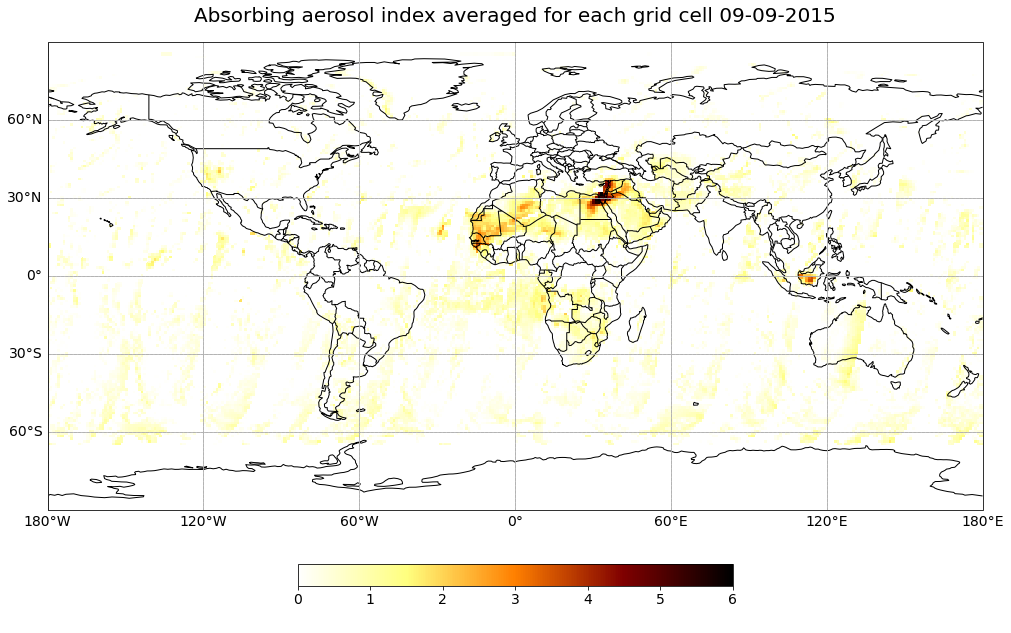

In [9]:
visualize_pcolormesh(data_array = aai_combined[:,:],
                     longitude = aai_combined.longitude, 
                     latitude = aai_combined.latitude,
                     projection = ccrs.PlateCarree(), 
                     color_scale = 'afmhot_r', 
                     unit = ' ',
                     long_name = aai_a.long_name + ' ' + str(aai_gome2a.description.split()[4]), 
                     vmin = 0, 
                     vmax = 6)


<br>

## <a id='subset_aai'></a> Generate a geographical subset and visualize the subset

Let's define a bounding box for the island of Borneo, where Kalimantan is located, with: `[-5, 8, 105, 120]`.

In [10]:
latmin = -5
latmax = 8.
lonmin = 105.
lonmax = 120.

<br>

Based on the bounding box information, you can now generate a geographical subset with the help of the function `generate_geographical_subset()`. The number of latitude and longitude pixels have decreased to 13 latitude and 15 longitude, respectively.

In [11]:
aai_combined_subset = generate_geographical_subset(aai_combined,
                                           latmin = latmin,
                                           latmax = latmax,
                                           lonmin = lonmin,
                                           lonmax = lonmax)
aai_combined_subset

<xarray.DataArray 'absorbing_aerosol_index' (latitude: 13, longitude: 15)>
array([[-0.47756806,  0.13571985,  0.34821236,  0.43908924,  0.47260952,
        -0.3304702 , -0.36268827, -0.47501883, -0.1634589 , -0.6812386 ,
        -0.81452477, -0.8395316 , -0.8597488 , -0.8735134 , -0.7100953 ],
       [-0.63341004,  0.00431276,  0.2598834 ,  0.355823  ,  0.2025051 ,
        -0.09732092,  0.5587178 ,  0.12283269,  0.47252184,  0.04024725,
        -0.4454187 , -0.5754272 , -0.6637063 , -0.8432757 , -0.42471012],
       [-0.74796706, -0.372169  , -0.21636926,  0.11057302,  0.22965312,
         0.9332094 ,  1.2841355 ,  1.871377  ,  2.2010634 ,  2.382238  ,
         0.309223  , -0.36737552, -1.0263672 , -0.74825215, -1.5093455 ],
       [-0.24759196, -0.6429495 , -0.26765236, -0.03939817,  0.7817058 ,
         1.3354226 ,  1.4776833 ,  2.6745577 ,  3.562013  ,  3.629315  ,
         1.6576731 , -0.09633353, -0.4148106 , -1.0535694 , -1.1070201 ],
       [ 0.2763699 , -0.59450126, -0.78241855, -0.392398  ,  2.274322  ,
         2.4561896 ,  1.82185   ,  2.5495842 ,  3.3055804 ,  3.617363  ,
         2.864383  ,  1.0539638 , -0.01206927, -0.6498909 , -0.7090515 ],
       [ 0.05367963, -0.37230843, -0.12888607,  0.512871  ,  3.3499174 ,
         3.220716  ,  2.0612786 ,  2.0990522 ,  2.1496038 ,  1.9436594 ,
         1.622681  ,  0.6783221 ,  0.12310382, -0.62542456, -0.8360012 ],
       [ 0.36800066, -0.35851187, -0.0880321 ,  0.3297698 ,  1.1719564 ,
         1.35042   ,  0.7577547 ,  0.9617641 ,  0.94754755,  0.45492753,
         0.16319428, -0.5075768 ,  0.06097556, -0.7779773 , -0.74200714],
       [ 0.36787823, -0.35622925, -0.6890864 , -0.05639306,  0.9046511 ,
        -2.2014296 ,  0.29284856,  0.1825273 ,  0.852515  ,  0.49793878,
        -0.2222425 ,  0.46741778, -0.35710627, -0.5606316 , -0.70626897],
       [ 0.81192124, -0.23964636, -0.5753919 , -0.7913043 ,  0.08874287,
        -0.87855697, -0.46217313, -0.11649868,  0.46242195,  0.17526245,
        -0.01143293,  0.6643693 , -0.17047605,  0.01709632, -1.1809781 ],
       [ 0.33497033,  0.02498482, -0.8132866 , -0.89818275, -0.32645595,
        -0.700588  ,         nan,  1.2087156 , -0.10504165, -0.35243118,
        -0.41372964, -0.11702479, -0.3578228 , -0.3868912 , -1.0275168 ],
       [-0.01114416, -0.41201866, -0.0800605 , -1.218022  , -0.43225935,
        -1.5402595 ,         nan,  0.6821184 ,  1.1736543 , -0.7718312 ,
        -1.1525222 , -0.685857  , -1.0777843 , -1.2526361 , -1.0546714 ],
       [-0.52803195, -0.00553924,  0.44774866, -0.33531016, -1.3166002 ,
        -1.0089152 ,         nan, -0.09620945,  0.5161726 ,  1.0373628 ,
        -1.0860579 , -0.3511253 , -0.18052849, -0.9493224 , -1.1741074 ],
       [-0.66580385, -0.22866212,  0.07104163, -0.21788509,  0.12952709,
        -1.6490989 ,         nan, -0.1995569 , -0.29494917,  0.9038211 ,
         0.98393977, -1.0085639 , -0.35482162,  0.1694003 ,  0.09093322]],
      dtype=float32)
Coordinates:
  * longitude  (longitude) float32 105.5 106.5 107.5 108.5 ... 117.5 118.5 119.5
  * latitude   (latitude) float32 -4.5 -3.5 -2.5 -1.5 -0.5 ... 4.5 5.5 6.5 7.5

<br>

In a last step, you can visualize the geographical subset for Borneo with the help of the `visualize_pcolormesh()` function. This time, you have to set the `set_global` kwarg to `False` and define the latitude and longitude minimum and maximum values as geographical bounds.

(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'Absorbing aerosol index averaged for each grid cell 09-09-2015'}>)

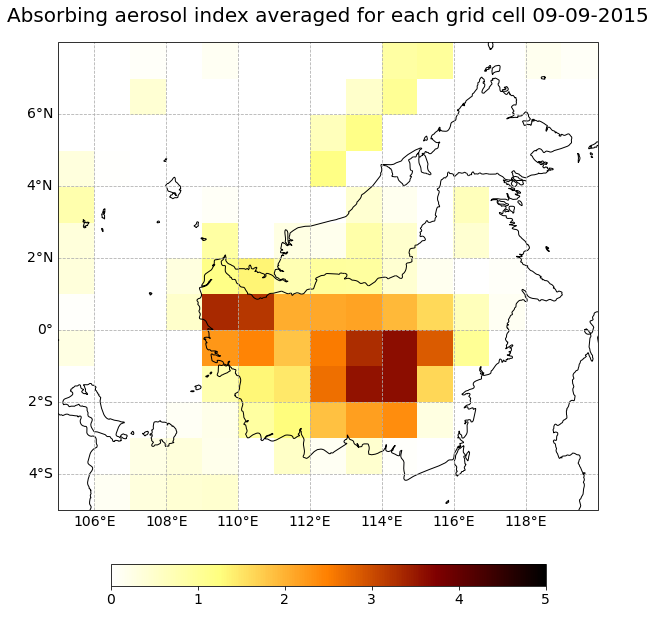

In [14]:
visualize_pcolormesh(data_array = aai_combined_subset[:,:],
                     longitude = aai_combined_subset.longitude, 
                     latitude = aai_combined_subset.latitude,
                     projection = ccrs.PlateCarree(), 
                     color_scale = 'afmhot_r', 
                     unit = ' ',
                     long_name = aai_a.long_name + ' ' + str(aai_gome2a.description.split()[4]), 
                     vmin = 0, 
                     vmax = 5,
                     latmin = latmin,
                     latmax = latmax,
                     lonmin = lonmin,
                     lonmax = lonmax,
                     set_global=False)

<br>

<hr>

<img src='../img/copernicus_logo.png' alt='Logo EU Copernicus' align='right' width='20%'><br><br><br><br>

<p style="text-align:right;">This project is licensed under the <a href="../LICENSE">MIT License</a> and is developed under a Copernicus contract.